### "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."¶
-AJ

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import scipy.stats as stats

#  Data processing (ETL)

In [2]:
#Importing the Data
df=pd.read_excel("data/train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [3]:
#looking at the data types and missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [4]:
#Checking for null values
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [5]:
#Dropping CHILD, SPORT, and COMP because they either have to many missing values or will not be valuable.
df = df.drop(['CHILD','SPORT','COMP'], axis=1)
df.head()


,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,0,1,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,0,0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,0,1,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,1,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,1,1,65,194


In [6]:
#Replacing the values that have blank spots with NaN also known as null value
df = df.replace(' ', np.nan)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,NaN,NaN,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,65,194


In [7]:
#checking again to see how many Null values I have now 
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
GNDR         498
OWNHOME     1999
PCTMARR        0
HOMEVAL        0
dtype: int64

In [8]:
#df = df.dropna()
#df.info()

In [9]:
#Looking at the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 16 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         7223 non-null float64
INCOME      7272 non-null float64
GNDR        8718 non-null float64
OWNHOME     7217 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 1.1+ MB


In [10]:
#Getting some statistical information to repalce the null values with
df.describe()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,7223.000000,7272.000000,8718.000000,7217.000000,9216.000000,9216.000000
mean,0.500000,0.337023,0.510525,0.636719,0.291124,0.480252,19.963108,6.378038,0.489475,61.392912,2.882151,0.447236,0.718581,58.228516,112.111220
std,0.500027,0.472718,0.499916,0.480971,0.454305,0.499637,8.820188,2.873927,0.499916,16.594747,1.843857,0.497237,0.449722,12.902173,92.292223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,48.000000,1.000000,0.000000,0.000000,52.000000,56.000000
50%,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,6.000000,0.000000,63.000000,3.000000,0.000000,1.000000,61.000000,81.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000,1.000000,75.000000,4.000000,1.000000,1.000000,67.000000,132.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,24.000000,1.000000,97.000000,6.000000,1.000000,1.000000,99.000000,600.000000


In [11]:
#Seeing which gender is more dominate 
df.groupby('GNDR').size()


GNDR
0.0    4819
1.0    3899
dtype: int64

In [12]:
#Seeing which group of Home owners are more dominate
df.groupby('OWNHOME').size()

OWNHOME
0.0    2031
1.0    5186
dtype: int64

In [13]:
# replacing Null values with the information gathered from above
df = df.replace({'AGE': np.NaN}, {'AGE': 61})
df = df.replace({'INCOME': np.NaN}, {'INCOME': 3})
df = df.replace({'GNDR': np.NaN}, {'GNDR': 0})
df = df.replace({'OWNHOME': np.NaN}, {'OWNHOME': 1})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 16 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null float64
INCOME      9216 non-null float64
GNDR        9216 non-null float64
OWNHOME     9216 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 1.1+ MB


# Data Visualization:

In [14]:
#correlation 
df.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.101921,0.028869,-0.040159,-0.109634,-0.141604,-0.023498,-0.139099,-0.189929,-0.023916,0.010530,0.007248,-0.018063,-0.023869,0.029722
Y1G5,-0.101921,1.000000,0.092901,-0.150656,0.116103,0.123291,0.043975,0.121479,0.045319,0.029899,-0.000865,-0.005599,0.021317,0.008064,-0.000382
Y1G4,0.028869,0.092901,1.000000,-0.082485,-0.076326,-0.094967,-0.003481,-0.095750,-0.090743,-0.061950,0.006825,0.002400,0.043924,0.001259,0.001030
Y1G3,-0.040159,-0.150656,-0.082485,1.000000,-0.091538,-0.135977,-0.045239,-0.100829,0.005308,-0.028564,0.020746,0.000198,-0.029841,-0.006574,0.001812
Y1G2,-0.109634,0.116103,-0.076326,-0.091538,1.000000,0.206763,0.061990,0.320802,0.276530,0.100051,-0.013631,-0.009714,-0.002148,0.019234,-0.013760
Y1G1,-0.141604,0.123291,-0.094967,-0.135977,0.206763,1.000000,-0.003982,0.244241,0.256153,0.087666,-0.028290,-0.025717,-0.002415,0.024756,-0.014693
Y1price,-0.023498,0.043975,-0.003481,-0.045239,0.061990,-0.003982,1.000000,0.043768,-0.090287,-0.028649,0.071470,0.042429,-0.018103,0.008032,0.095580
YEARS,-0.139099,0.121479,-0.095750,-0.100829,0.320802,0.244241,0.043768,1.000000,0.533836,0.286248,-0.089712,-0.020403,-0.003753,0.023691,-0.049689
BACKER,-0.189929,0.045319,-0.090743,0.005308,0.276530,0.256153,-0.090287,0.533836,1.000000,0.184036,-0.084987,-0.029201,-0.008838,0.032558,-0.064727
AGE,-0.023916,0.029899,-0.061950,-0.028564,0.100051,0.087666,-0.028649,0.286248,0.184036,1.000000,-0.214986,0.015882,-0.038427,-0.050937,-0.014367


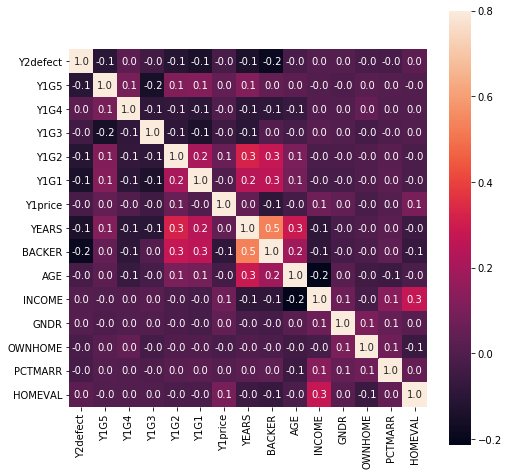

In [15]:
#heat map
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

In [34]:
#pivot Table
df.groupby('Y2defect').mean()

,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
Y2defect,,,,,,,,,,,,,,
0,0.385200,0.496094,0.656033,0.340929,0.550998,20.170356,6.777778,0.584418,61.659288,2.889757,0.419488,0.787109,58.536458,109.368273
1,0.288845,0.524957,0.617405,0.241319,0.409505,19.755859,5.978299,0.394531,60.956597,2.924262,0.426649,0.772135,57.920573,114.854167


In [51]:
#Group by 
df.groupby(['Y2defect']).count()

,FAKEID,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
Y2defect,,,,,,,,,,,,,,,
0,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608
1,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608


In [54]:
# Performing a a Cross table to see which Breach type causes the most damage in terms of the total.
pd.crosstab(df.Y2defect, df.GNDR)

GNDR,0.0,1.0
Y2defect,,
0,2675,1933
1,2642,1966


C:\ProgramData\Anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


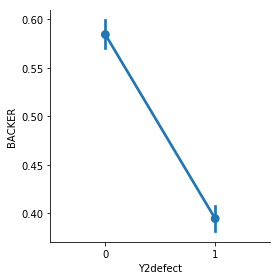

In [58]:
#Seaborn
sns.factorplot("Y2defect", "BACKER", data=df)

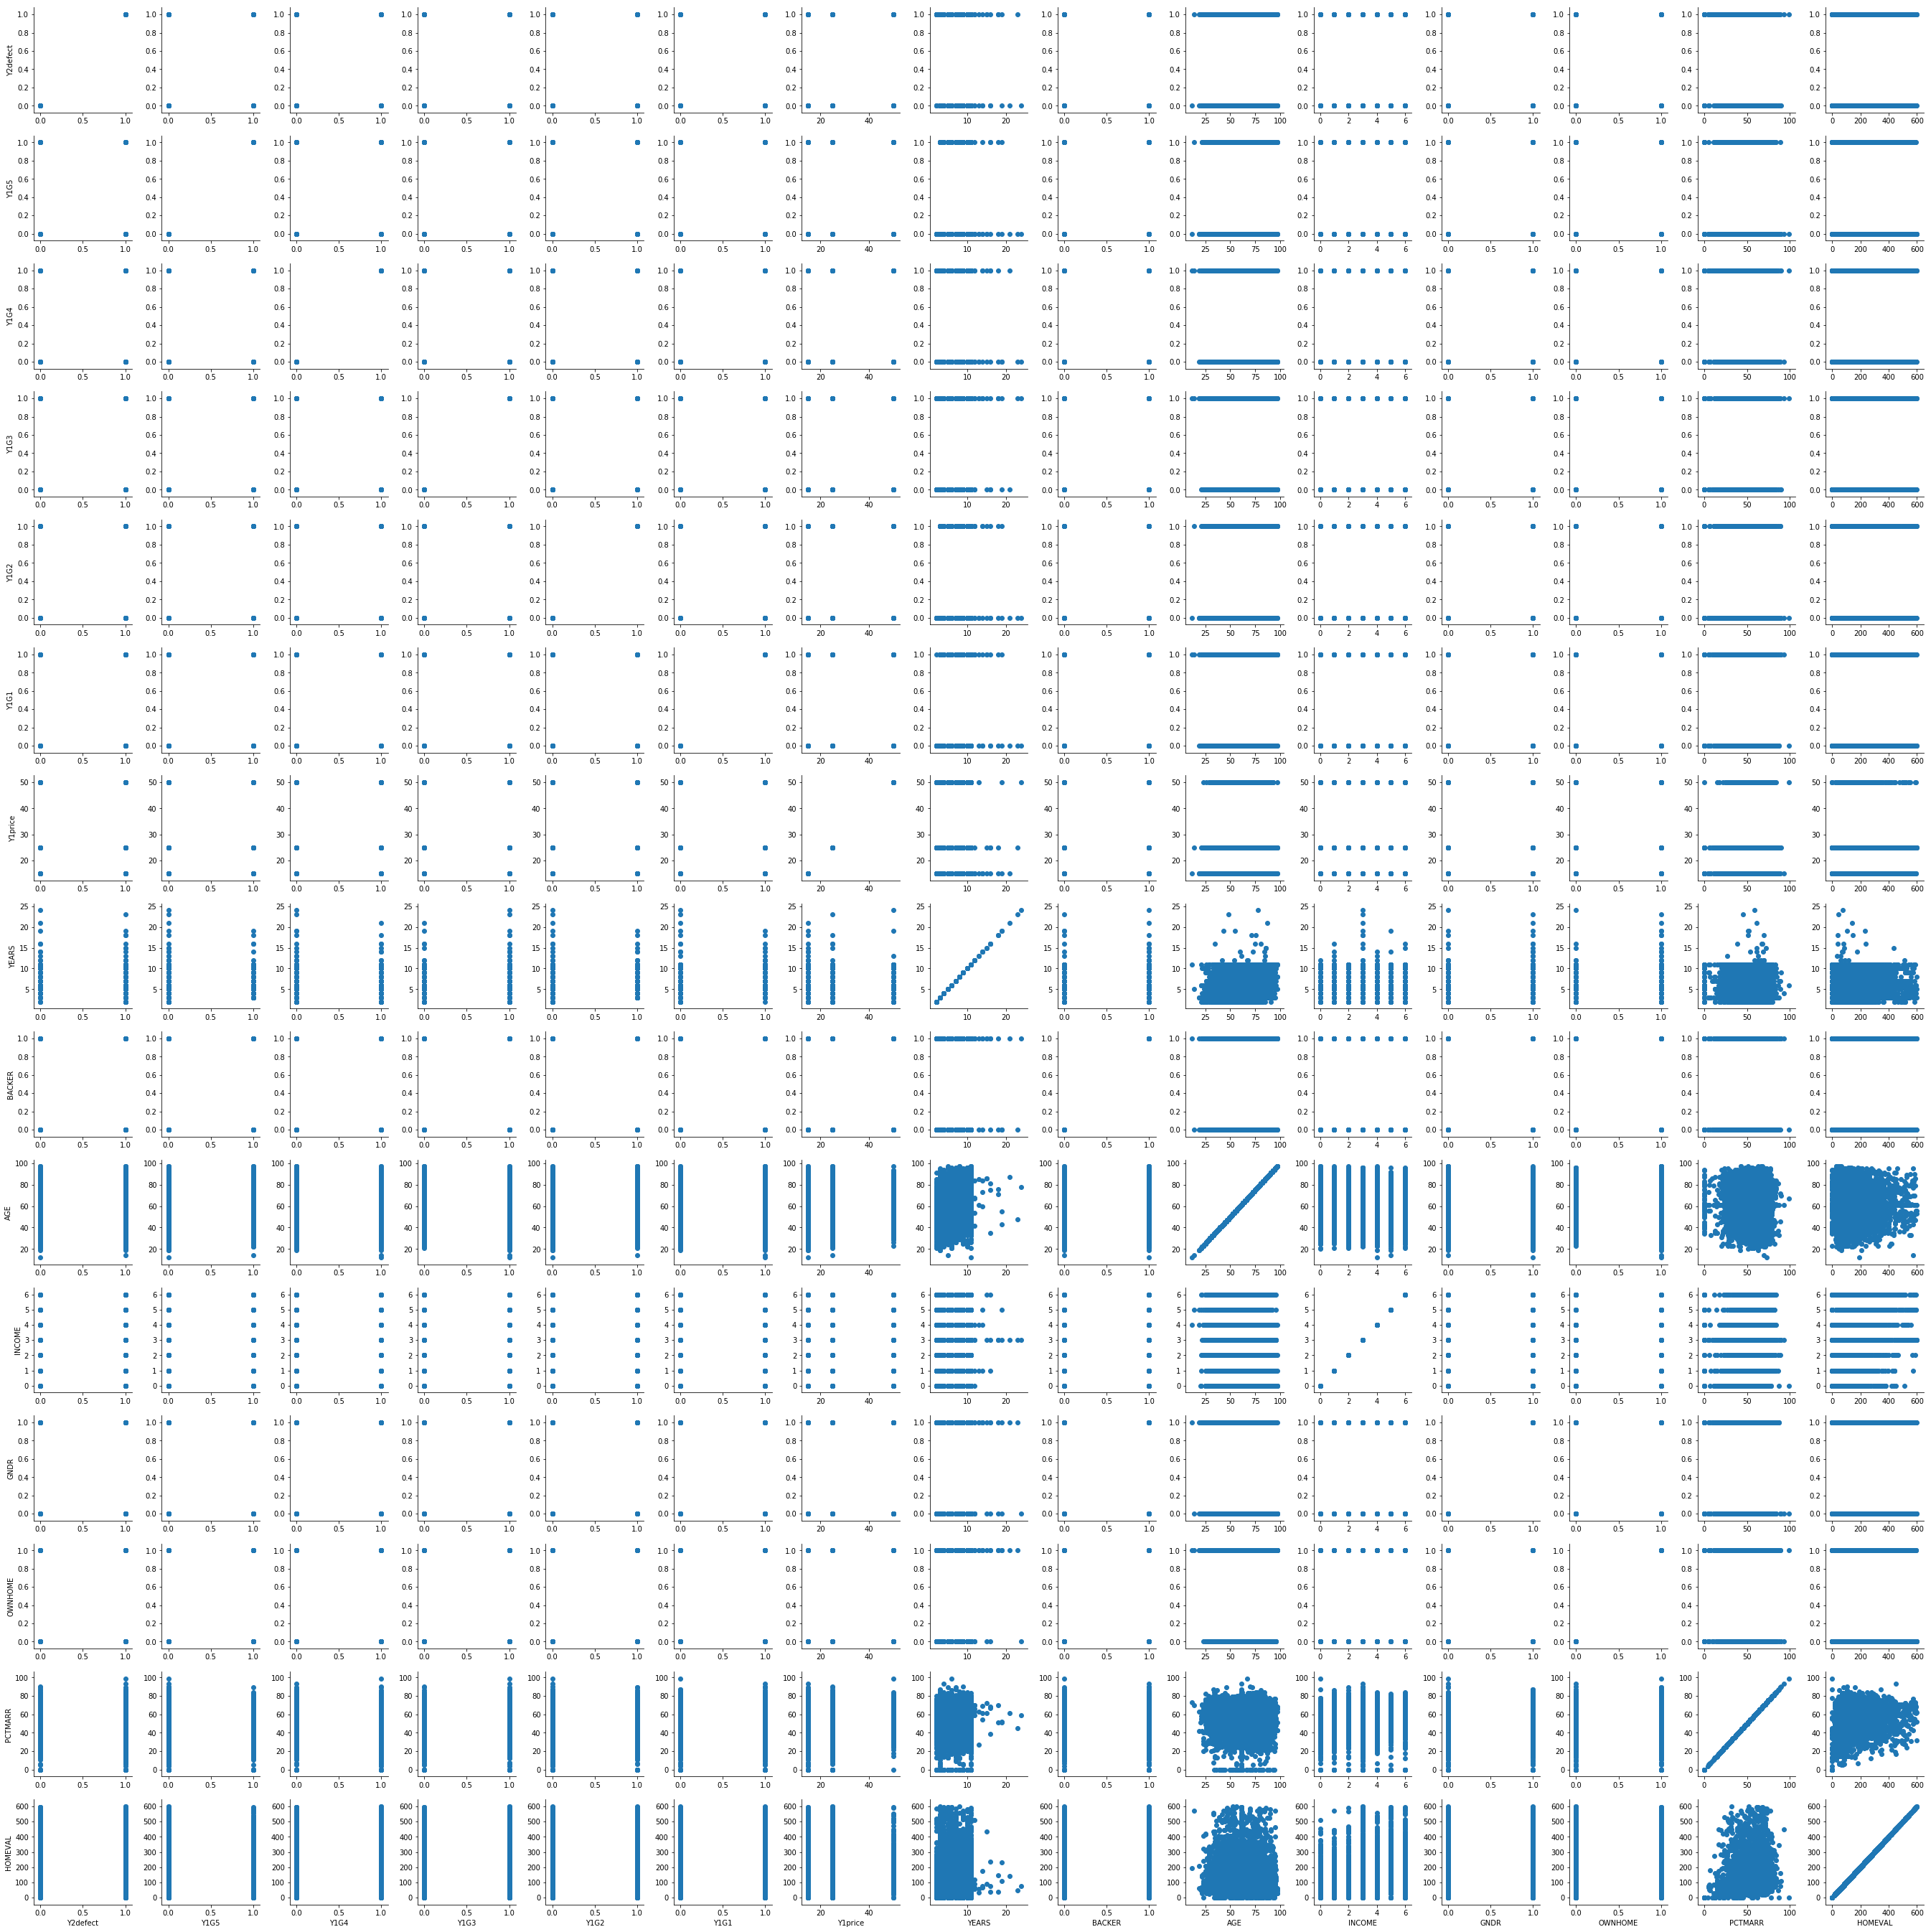

In [33]:
# plot PairGrid

g = sns.PairGrid(df)
g.map(plt.scatter)

# Exploratory data analysis

In [38]:
# Two sample T and P test 
female = df[df['GNDR'] == 0]['Y2defect']
male = df[df['GNDR'] == 1]['Y2defect']
stats.ttest_ind(female, male)

Ttest_indResult(statistic=-0.6957280336214281, pvalue=0.4866167127613349)

In [39]:
#print three decimal points
two_sample = stats.ttest_ind(female, male)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is -0.696 and the p-value is 0.487.


# Model Selection and Evaluation

In [45]:
#Displaying info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 16 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null float64
INCOME      9216 non-null float64
GNDR        9216 non-null float64
OWNHOME     9216 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 1.1+ MB


## I was not able to run KNN due to the way the data is structured and I didn't want to break my other models by changing it so I let if here to you the error and why it wasn't able to be done

In [48]:
#selecting K best
y = df['Y2defect']
X = df.drop(['Y2defect'], axis=1)

X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print X_new

ValueError: invalid literal for float(): 006P59RL

In [50]:
#KNN
# declare X variables and y variable
y = df['Y2defect']
X = df.drop(['Y2defect'], axis=1)

# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()    #  n_neighbors=5 by default
knn.fit(X_train, y_train)

#Model evaluation without valdation
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

ValueError: invalid literal for float(): 341D94PS

In [16]:
#Making a DecisionTreeClassifier
y = df['Y2defect']
X = df[['Y1price', 'BACKER', 'YEARS', 'GNDR', 'Y1G5']]

In [17]:
#Making a DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
#Making a DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
#Printing data
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.6036166365280289
[[949 414]
 [682 720]]
             precision    recall  f1-score   support

          0       0.58      0.70      0.63      1363
          1       0.63      0.51      0.57      1402

avg / total       0.61      0.60      0.60      2765

0.6049051611627033


The best model to use for this particular data would be Decision Tree Classifier

## Model Deployment & Prepare Entry Data

In [20]:
#reading in the validation data set
df2 = pd.read_excel("data/validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [21]:
# renaming columns
df2= df2.rename(columns={'Y2price' : 'Y1price', 'Y2G5' : 'Y1G5'})
df2.head()

,FAKEID,Y3defect,Y1G5,Y2G4,Y2G3,Y2G2,Y2G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [22]:
#looking at the data types and missing values 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 19 columns):
FAKEID      9542 non-null object
Y3defect    0 non-null float64
Y1G5        9542 non-null int64
Y2G4        9542 non-null int64
Y2G3        9542 non-null int64
Y2G2        9542 non-null int64
Y2G1        9542 non-null int64
Y1price     9542 non-null int64
YEARS       9542 non-null int64
BACKER      9542 non-null int64
AGE         7055 non-null float64
INCOME      9542 non-null object
CHILD       4810 non-null object
GNDR        9542 non-null object
OWNHOME     9542 non-null object
SPORT       4180 non-null float64
COMP        9542 non-null object
PCTMARR     9542 non-null int64
HOMEVAL     9542 non-null int64
dtypes: float64(3), int64(10), object(6)
memory usage: 1.4+ MB


In [23]:
#Replacing the values that have blank spots with NaN also known as null value
df2 = df2.replace(' ', np.nan)
df2.head()

,FAKEID,Y3defect,Y1G5,Y2G4,Y2G3,Y2G2,Y2G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4.0,NaN,0.0,1.0,0.0,NaN,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5.0,NaN,0.0,NaN,0.0,NaN,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4.0,1.0,0.0,1.0,NaN,NaN,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4.0,NaN,1.0,1.0,0.0,NaN,65,110


In [24]:
#Dropping CHILD, SPORT, and COMP because they either have to many missing values or will not be valuable.
df2 = df2.drop(['CHILD','SPORT','COMP'], axis=1)
df2.head()

,FAKEID,Y3defect,Y1G5,Y2G4,Y2G3,Y2G2,Y2G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4.0,0.0,1.0,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5.0,0.0,NaN,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,NaN,0.0,0.0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4.0,0.0,1.0,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4.0,1.0,1.0,65,110


In [25]:
#Getting some statistical information to repalce the null values with
df2.describe()

,Y3defect,Y1G5,Y2G4,Y2G3,Y2G2,Y2G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
count,0.0,9542.000000,9542.000000,9542.000000,9542.000000,9542.00000,9542.000000,9542.000000,9542.000000,7055.000000,7127.000000,8977.000000,7590.000000,9542.000000,9542.000000
mean,NaN,0.171872,0.613708,0.433871,0.586984,0.52599,21.128694,6.001467,0.484804,62.111410,2.879332,0.429988,0.670751,58.126808,112.767554
std,NaN,0.377289,0.486924,0.495634,0.492401,0.49935,9.731992,3.119228,0.499795,16.448692,1.854905,0.495102,0.469971,13.039348,93.453839
min,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,15.000000,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,15.000000,3.000000,0.000000,49.000000,1.000000,0.000000,0.000000,52.000000,55.000000
50%,NaN,0.000000,1.000000,0.000000,1.000000,1.00000,15.000000,6.000000,0.000000,63.000000,3.000000,0.000000,1.000000,61.000000,81.000000
75%,NaN,0.000000,1.000000,1.000000,1.000000,1.00000,25.000000,9.000000,1.000000,76.000000,4.000000,1.000000,1.000000,67.000000,134.000000
max,NaN,1.000000,1.000000,1.000000,1.000000,1.00000,50.000000,19.000000,1.000000,98.000000,6.000000,1.000000,1.000000,90.000000,600.000000


In [26]:
#Seeing which gender is more dominate 
df2.groupby('GNDR').size()

GNDR
0.0    5117
1.0    3860
dtype: int64

In [27]:
#Seeing which group of Home owners are more dominate
df.groupby('OWNHOME').size()

OWNHOME
0.0    2031
1.0    7185
dtype: int64

In [28]:
# replacing Null values with the information gathered from above
df2 = df2.replace({'AGE': np.NaN}, {'AGE': 62})
df2 = df2.replace({'INCOME': np.NaN}, {'INCOME': 3})
df2 = df2.replace({'GNDR': np.NaN}, {'GNDR': 0})
df2 = df2.replace({'OWNHOME': np.NaN}, {'OWNHOME': 1})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 16 columns):
FAKEID      9542 non-null object
Y3defect    0 non-null float64
Y1G5        9542 non-null int64
Y2G4        9542 non-null int64
Y2G3        9542 non-null int64
Y2G2        9542 non-null int64
Y2G1        9542 non-null int64
Y1price     9542 non-null int64
YEARS       9542 non-null int64
BACKER      9542 non-null int64
AGE         9542 non-null float64
INCOME      9542 non-null float64
GNDR        9542 non-null float64
OWNHOME     9542 non-null float64
PCTMARR     9542 non-null int64
HOMEVAL     9542 non-null int64
dtypes: float64(5), int64(10), object(1)
memory usage: 1.2+ MB


The column names of validation dataset must be same as those of the training-testing dataset.

In [29]:
#calidating data
validation = df2[['Y1price', 'BACKER', 'YEARS', 'GNDR', 'Y1G5']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 5 columns):
Y1price    9542 non-null int64
BACKER     9542 non-null int64
YEARS      9542 non-null int64
GNDR       9542 non-null float64
Y1G5       9542 non-null int64
dtypes: float64(1), int64(4)
memory usage: 372.8 KB


In [30]:
#displaying a column 
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [31]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("data/submissionentry.csv", index=False)

In [32]:
#showing the top of the data 
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,61.0,3.0,0.0,0.0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,65,194


# Story telling 

As you can see from the data that I have been able to predict whether or not someone will renew their season tickets with about 60% accuracy. I used several variables to help me to determine whether or not someone was going to renew, which for example I used Y1price, BACKER, YEARS, GNDR, Y1G5 for my X, and Y2defect for my Y. I also would suggest having previous season ticket holders data to furtherer more make this model more accurate and to also  collect more data as to why they didn’t renew and what made them  renew like the phone call we suggested to be made to them.